In [1]:
import numpy as np
import pandas as pd

## Problema I

Yo voy a tener variables y unso pesos asociados a esas variables

Se desea estimar el valor 𝑌 de una casa dada su superficie 𝑋1 y el número de
habitaciones 𝑋2 . Hasta ahora, se conocen los siguientes datos de
entrenamiento:

In [2]:
a = np.matrix('120 60 1; 125 55 2; 130 70 1; 112 60 2; 122 62 1; 135 70 2; 128 60 3; 140 80 1; 150 80 2; 160 85 3')
df_train = pd.DataFrame(a, columns = ['y_objetivo','x1','x2'])
df_train

y_objetivo  x1  x2
0         120  60   1
1         125  55   2
2         130  70   1
3         112  60   2
4         122  62   1
5         135  70   2
6         128  60   3
7         140  80   1
8         150  80   2
9         160  85   3

Se pide hallar:
1. El modelo de regresión lineal simple de 𝑌 en función de 𝑋1.
2. El modelo de regresión lineal simple de 𝑌 en función de 𝑋2.
3. El modelo de regresión lineal múltiple de 𝑌 en función de 𝑋1 y 𝑋2.
4. Validar cada modelo con el siguiente conjunto de test.

In [3]:
b = np.matrix('120 58 1; 128 50 3; 140 80 1; 115 65 2; 120 55 1; 145 75 2; 125 55 3; 170 80 3; 135 70 1; 155 75 3')
df_test = pd.DataFrame(b, columns = ['y_objetivo','x1','x2'])
df_test

y_objetivo  x1  x2
0         120  58   1
1         128  50   3
2         140  80   1
3         115  65   2
4         120  55   1
5         145  75   2
6         125  55   3
7         170  80   3
8         135  70   1
9         155  75   3

Lo primero es escalar las variables del conjunto **TRAIN**  de x1 y x2 para que esten entre 0-1

In [4]:
for i in range(len(df_train.x1)):
    df_train.x1[i]= (df_train.x1[i] - min(df_train.x1))/(max(df_train.x1) - min(df_train.x1))
    
for i in range(len(df_train.x2)):
    df_train.x2[i]= (df_train.x2[i] - min(df_train.x2))/(max(df_train.x2) - min(df_train.x2))

df_train

C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_4820\328919173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.x2[i]= (df_train.x2[i] - min(df_train.x2))/(max(df_train.x2) - min(df_train.x2))


y_objetivo        x1        x2
0         120  0.166667  0.000000
1         125  0.646365  0.666667
2         130  0.823183  0.333333
3         112  0.705305  0.666667
4         122  0.728880  0.333333
5         135  0.823183  0.666667
6         128  0.705305  1.000000
7         140  0.941061  0.333333
8         150  0.941061  0.666667
9         160  1.000000  1.000000

Ahora tenemos que sacar la media de cada columna


In [5]:
import statistics

media_all = []

media_x1 = statistics.median(df_train.x1)
media_all.append(media_x1)

media_x2 = statistics.median(df_train.x2)
media_all.append(media_x2)

media_y = statistics.median(df_train.y_objetivo)
media_all.append(media_y)
    
print (media_all)

[0.7760314341846759, 0.6666666666666666, 129.0]


Con estos datos calculo la matriz de varianza y covarianza

In [6]:
# Utilizo la funcion de pandas para generar la matriz de covarianza
covMatrix = df_train.cov()

print(covMatrix)

            y_objetivo        x1        x2
y_objetivo  210.400000  2.339322  1.948148
x1            2.339322  0.055738  0.041598
x2            1.948148  0.041598  0.100000


Ahora con los resultado de la matriz de covarianza y la media calculamos cada modelo.

<center> <h4>El modelo de regresión lineal simple de 𝑌 en función de 𝑋1</h4> </center>

Aqui voy a utilizar la formula **simplificada** ----> Sx1,y/ **Sx1

En otras palabras la covarianza entre X1 e Y, dividido entre la covarianza de x1 al cuadrado


In [7]:
beta_sub1 = 2.339322/0.055738

print('La variable beta sub 1 es: ',beta_sub1)

La variable beta sub 1 es:  41.969966629588434


Una vez que tengamos esto aplicamos la formula para el sezgo (beta sub 0):

    - media de Y (el resultado de la media de Y ONLY) , menos el valor estimado de beat_1, por la media de X1

In [8]:
beta_sub0 = media_y - (beta_sub1 * media_x1)

print('La variable beta sub 0 (sezgo) es: ',beta_sub0)

La variable beta sub 0 (sezgo) es:  96.4299866037575


Entonces con esta informacion mi modelos es el siguiente:

- **y = 96.4299866037575 + (41.969966629588434 * x1)**

<center> <h4>El modelo de regresión lineal simple de 𝑌 en función de 𝑋2</h4> </center>

In [9]:
print(covMatrix)

            y_objetivo        x1        x2
y_objetivo  210.400000  2.339322  1.948148
x1            2.339322  0.055738  0.041598
x2            1.948148  0.041598  0.100000


Aqui voy a utilizar la formula simplificada ----> Sx2,y/ **Sx2

En otras palabras la covarianza entre X1 e Y, dividido entre la covarianza de x2 al cuadrado (dato de la tabla)

In [10]:
beta_sub2 = 2.339322/0.100000

print('La variable beta sub 2 es: ',beta_sub2)

La variable beta sub 2 es:  23.39322


Una vez que tengamos esto aplicamos la formula para el sezgo (beta sub 0):

- media de Y (el resultado de la media de Y ONLY) , menos el valor estimado de Betasub1, por la media de X2

In [11]:
beta_sub0 = media_y - (beta_sub2 * media_x2)

print('La variable beta sub 0 (sezgo) es: ',beta_sub0)

La variable beta sub 0 (sezgo) es:  113.40452


Entonces con esta informacion mi modelos es el siguiente:

- **y = 113.40452 + (23.39322 * x2)**

<center> <h4>El modelo de regresión lineal múltiple de 𝑌 en función de 𝑋1 y 𝑋2.</h4> </center>

Aqui es importante tener en cuenta lo que se hablo de el SIGNO. Es importante camabir de signo si en NEGATIVO


y_predecida = beta_0 + beta1_x1 +beta2_x2

In [12]:
print(covMatrix)

            y_objetivo        x1        x2
y_objetivo  210.400000  2.339322  1.948148
x1            2.339322  0.055738  0.041598
x2            1.948148  0.041598  0.100000


**Entonces lo primero es averiguar cual es la beta_i**

La beta se averigua calculando los conjuntos(A)

beta_i = - (A1, i+1 / A1, 1)

Entonces aplicamos esta formula a cada beta (beta_1, beta_2)

**Calculo beta_1**

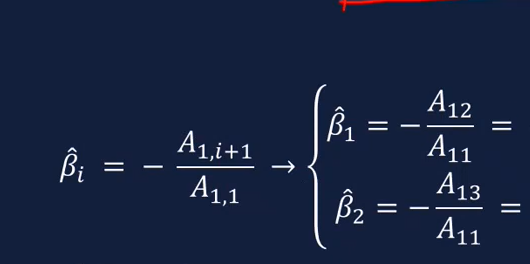

In [13]:
from IPython.display import Image
Image("img/1.png")

En este caso la i es:
    
- beta_1 = -(A1, 2 / A1 , 1)  

i = 1  --> representa X1

A1 , 2 = Primera fila segnda columna (ELIMINAR)

A1 , 1 = Primera fila primera fila (ELIMINAR)



Entonces quito esas columnas y despues multiplico en X los valores que quedan

In [14]:
print(covMatrix)

            y_objetivo        x1        x2
y_objetivo  210.400000  2.339322  1.948148
x1            2.339322  0.055738  0.041598
x2            1.948148  0.041598  0.100000


a = 2.339322*0.100000

b = 0.041598*1.948148

c = a-b

beta_1 = -(c  / A1 , 1)

In [15]:
a = 2.339322*0.100000

b = 0.041598*1.948148

c = a-b

print('(A1 , 2) es igual a : ',c)

(A1 , 2) es igual a :  0.15289313949600003


<p><h3>REVISAR</h3>  el signo si hay que cambiarlo</p>

beta_1 = -(A1, 2 / A1 , 1) ---> Entonces como la suma es 1 * 2 = 3 (**IMPAR** = CAMBIO SIGNO)

beta_1 = -(-(A1, 2) / A1 , 1)



Ahora solo tengo que calcular A1 , 1 de la misma manera pero ya no me preocupo del símbolo.

In [16]:
print(covMatrix)

            y_objetivo        x1        x2
y_objetivo  210.400000  2.339322  1.948148
x1            2.339322  0.055738  0.041598
x2            1.948148  0.041598  0.100000


In [17]:
ai = 0.055738 * 0.100000
bi = 0.041598 * 0.041598
ci = a-b
print('(A1 , 1) es igual a : ',ci)

(A1 , 1) es igual a :  0.15289313949600003


Ahora finalizo l formula de beta_1

In [18]:
beta_1 = -(-(c) / ci)

print('beta_1 es igual a :', beta_1)

beta_1 es igual a : 1.0


**Calculo beta_2**

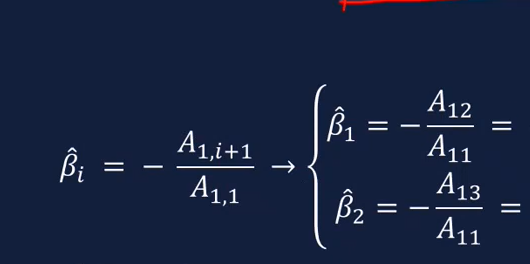

In [19]:
from IPython.display import Image
Image("img/1.png")

En este caso la i es:
    
- beta_2 = -(A1, 3 / A1 , 1)  

A1 , 3 = Primera fila tercera columna (ELIMINAR)

A1 , 1 = Primera fila primera fila (ELIMINAR)

In [20]:
print(covMatrix)

            y_objetivo        x1        x2
y_objetivo  210.400000  2.339322  1.948148
x1            2.339322  0.055738  0.041598
x2            1.948148  0.041598  0.100000


Entonces quito esas columnas y despues multiplico en X los valores que quedan

a2 = 2.339322*0.041598 

b2 = 0.055738*1.948148

c2 = a2-b2

beta_1 = -(c2  / A1 , 1)

In [21]:
a2 = 2.339322*0.041598 

b2 = 0.055738*1.948148

c2 = a2-b2

print('(A1 , 3) es igual a : ',c2)

(A1 , 3) es igual a :  -0.011274756667999986


<p><h3>REVISAR</h3>  el signo si hay que cambiarlo</p>

beta_2 = -(A1, 3 / A1 , 1) ---> Entonces como la suma es 1 * 3 = 4 (**PAR** = DEJO EL SIGNO)

Ahora solo tengo que calcular A1 , 1 de la misma manera pero ya no me preocupo del símbolo.

**Pero como ya la sacamos más arriba pues ya la tenemos** (ci)

Ahora finalizo l formula de beta_2

In [22]:
beta_2 = -(c2 / ci)

print('beta_2 es igual a :', beta_1)

beta_2 es igual a : 1.0


**Ahora calculo beta_0**

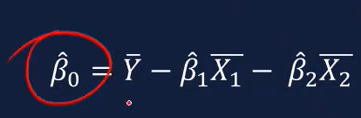

In [23]:
from IPython.display import Image
Image("img/2.png")

Esto se lee:
    
- beta_0 = media_y - (beta_1 - media_x1) - (beta_2 - media_x2)

In [24]:
beta_0 =  media_y - (beta_1 * media_x1) - (beta_2 * media_x2)

print('beta_0 es igual a :', beta_0)

beta_0 es igual a : 128.17480674946364


<center> <h4>Comprobar mi modelo con los datos de prueba del conjunto TEST </h4> </center>

Ahora tengo que escalar los datos del conmjunto de prueba

**Pero se escalan tomando en cuenta el MIN y MAX del conjunto de TRAIN**

Esto porque el test nunca lo voy a ver, y si las variables las escale en el TRAIN entre [0,1]

tengo que escalar el conjunto TEST con las mimas variables [0,1] del TRAIN

In [25]:
# Using statistics.median() from statistics
media1 = statistics.median(df_test.x1)
media2 = statistics.median(df_test.x1)

# Deviacion media
varianza1 = df_test.x1.mad()
varianza2 = df_test.x1.mad()

# Printing result
print("Mediana de la predicción 1 es : " + str(media1))
print("Mediana de la predicción 2 es : " + str(media2))
print(' ')
print("Varianza de la predicción 1 es : " + str(varianza1))
print("Varianza de la predicción 2 es : " + str(varianza2))


# Normalizo las predicciones
for i in range(len(df_test.x1)):
    df_test.x1[i]= (df_test.x1[i] - media1)/varianza1
    
for i in range(len(df_test.x2)):
    df_test.x2[i]= (df_test.x2[i] - media1)/varianza2


#Escalo para que me queden valores [0,1]
for i in range(len(df_test.x1)):
    df_test.x1[i]= (df_test.x1[i] - min(df_train.x1))/(max(df_train.x1) - min(df_train.x1))
    
for i in range(len(df_test.x2)):
    df_test.x2[i]= (df_test.x2[i] - min(df_train.x2))/(max(df_train.x2) - min(df_train.x2))

df_test

Mediana de la predicción 1 es : 67.5
Mediana de la predicción 2 es : 67.5
 
Varianza de la predicción 1 es : 9.7
Varianza de la predicción 2 es : 9.7


C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_4820\3361506207.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.x2[i]= (df_test.x2[i] - media1)/varianza2


y_objetivo        x1        x2
0         120 -1.375258 -6.855670
1         128 -2.364948 -6.649485
2         140  1.346392 -6.855670
3         115 -0.509278 -6.752577
4         120 -1.746392 -6.855670
5         145  0.727835 -6.752577
6         125 -1.746392 -6.649485
7         170  1.346392 -6.649485
8         135  0.109278 -6.855670
9         155  0.727835 -6.649485

**Error absoluto medio ( Mean Absolute Error, MAE):**

In [26]:
from sklearn.metrics import mean_absolute_error
from numpy import mean

mae1= mean_absolute_error(df_test.y_objetivo, df_test.x1)
mae2 = mean_absolute_error(df_test.y_objetivo, df_test.x2)

print(mae1)
print(mae2)

135.6484536082474
142.05257731958758


In [27]:
# En esta lista guardo los errores
errores1 = []
errores2 = []
# Recorro la lista de la columna objetivo
for i in range(len(df_test.y_objetivo)):
    
        error1 = df_test.y_objetivo[i] - df_test.x1[i]  
        error2 = df_test.y_objetivo[i] - df_test.x2[i]
        
        errores1.append(error1)
        errores2.append(error2)
    
c1x = mean(errores1)
c2x = mean(errores2)

print (c1x)
print (c2x)

135.6484536082474
142.05257731958758


**MSE Mean Squared Error(Error medio cuadrado)**

In [28]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(df_test.y_objetivo, df_test.x1)

#mse11 = np.sqrt((df.y_objetivo - df.pred_m1) ** 2)

mse2 = mean_squared_error(df_test.y_objetivo, df_test.x2)

# mse = (np.square(df.y_objetivo, df.pred_m1)).mean()

print (mse1)        
print (mse2)

18643.49259857583
20452.454256562873


**El error cuadrático medio, o RMSE**

In [29]:
# sklearn.métrica importar mean_squared_error
from sklearn.metrics import mean_squared_error

rmse1x = np.sqrt(((df_test.y_objetivo - df_test.x1) ** 2).mean())
rmse2x = np.sqrt(((df_test.y_objetivo - df_test.x2) ** 2).mean())

print(rmse1x)
print(rmse2x)

136.54117546943792
143.01207731014495


| Métrica | Mae | MSE | RMMSE |
| --- | --- | --- | ----- |
| M1 | 135.6484536082474 | 18643.49259857583 | 136.54117546943792 |
| M2 | 133.3 | 18031.9 | 134.28291030507197 |


-------------------------------------------------------------------------------------------------

## Problema II

Haciendo uso de la base de datos Iris vista anteriormente, se ha ejecutado
un algoritmo para estimar los parámetros de una regresión logística múltiple.
Como el problema tiene tres clases: setosa (1), versicolor (2) y virgínica (3), se
han generado los dos modelos siguientes:
- 𝑓1(𝑿, 𝛽1) = 541.0741 – 33.121𝑋1 − 10.2824𝑋2 − 38.5734𝑋3 − 90.4374𝑋4
- 𝑓2(𝑿,𝜷𝟐) = 501.1562 − 26.3497𝑋1 − 24.2689𝑋2 − 10.7613𝑋3 − 130.0915𝑋4

Se pide:
    
1. Hallar las predicciones del modelo para el siguiente conjunto de test.

2. Evaluar el rendimiento del clasificador en dicho conjunto.

3. Comparar el modelo obtenido con el expuesto en la lección 3.

In [30]:
patrones = np.matrix('1 4.6 3.2 1.4 0.2 1; 2 5.3 3.7 1.5 0.2 1; 3 5.7 4.4 1.5 0.4 1; 4 5.0 3.5 1.6 0.6 2; 5 5.5 2.5 4.0 1.3 2; 6 5.7 3.0 4.2 1.2 2; 7 5.7 2.8 4.1 1.3 3; 8 5.8 2.7 5.1 1.9 3;9 6.3 2.5 5.0 1.9 3; 10 5.9 3.0 5.1 1.8 3')
df_p = pd.DataFrame(patrones, columns = ['patron','x1','x2','x3','x4','clase'])
df_p

patron   x1   x2   x3   x4  clase
0     1.0  4.6  3.2  1.4  0.2    1.0
1     2.0  5.3  3.7  1.5  0.2    1.0
2     3.0  5.7  4.4  1.5  0.4    1.0
3     4.0  5.0  3.5  1.6  0.6    2.0
4     5.0  5.5  2.5  4.0  1.3    2.0
5     6.0  5.7  3.0  4.2  1.2    2.0
6     7.0  5.7  2.8  4.1  1.3    3.0
7     8.0  5.8  2.7  5.1  1.9    3.0
8     9.0  6.3  2.5  5.0  1.9    3.0
9    10.0  5.9  3.0  5.1  1.8    3.0

**Entonces tenemos varias clases** (1,2,3)

Entonces es una regresion logistica MULTICLASE

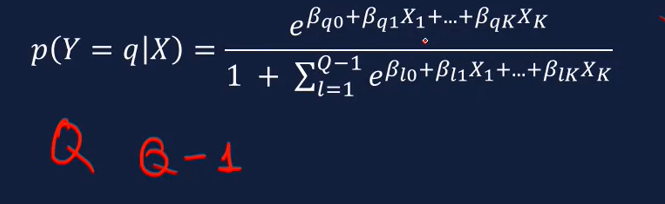

In [31]:
from IPython.display import Image
Image("img/3.png")

Lo que digo es:
    
- La probabilidad de que Y sea igual a Q dado un patron X va a ser:

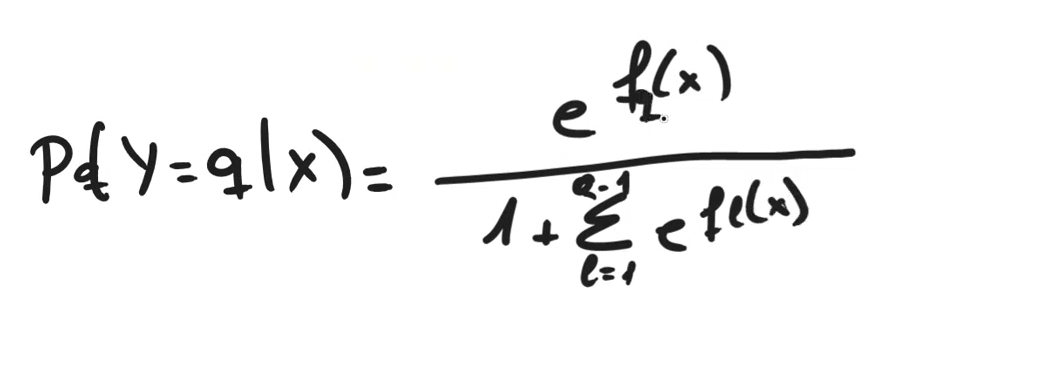

In [32]:
from IPython.display import Image

Image("img/4.png")

In [33]:
df_p

patron   x1   x2   x3   x4  clase
0     1.0  4.6  3.2  1.4  0.2    1.0
1     2.0  5.3  3.7  1.5  0.2    1.0
2     3.0  5.7  4.4  1.5  0.4    1.0
3     4.0  5.0  3.5  1.6  0.6    2.0
4     5.0  5.5  2.5  4.0  1.3    2.0
5     6.0  5.7  3.0  4.2  1.2    2.0
6     7.0  5.7  2.8  4.1  1.3    3.0
7     8.0  5.8  2.7  5.1  1.9    3.0
8     9.0  6.3  2.5  5.0  1.9    3.0
9    10.0  5.9  3.0  5.1  1.8    3.0

Hago otro dataset solo con los atributos

In [34]:
df_atr =  df_p[['x1','x2','x3','x4']]

print(df_atr)

    x1   x2   x3   x4
0  4.6  3.2  1.4  0.2
1  5.3  3.7  1.5  0.2
2  5.7  4.4  1.5  0.4
3  5.0  3.5  1.6  0.6
4  5.5  2.5  4.0  1.3
5  5.7  3.0  4.2  1.2
6  5.7  2.8  4.1  1.3
7  5.8  2.7  5.1  1.9
8  6.3  2.5  5.0  1.9
9  5.9  3.0  5.1  1.8


**clase inicial**



e = 1

**total de clases (q clases). En este caso tengo dos funciones**

q = 2

𝑓1(x) = 541.0741 – 33.121*𝑋1 − 10.2824*𝑋2 − 38.5734*𝑋3 − 90.4374*𝑋4

𝑓2(x) = 501.1562 − 26.3497*𝑋1 − 24.2689*𝑋2 − 10.7613*𝑋3 − 130.0915*𝑋4



<center> <h6> Funcion 1 </h6> </center>

In [35]:
f1_X = []

# Lo que tengo son 3 posibilidades
probabilidad1 = []

# Iteración por filas del DataFrame:
for indice_fila, fila in df_atr.iterrows():
    #print(indice_fila)
    #print(fila['x1'])
 
    res_1 = 541.0741-(33.121*fila['x1'])-(10.2824*fila['x2'])-(38.5734*fila['x3'])-(90.4374*fila['x4'])
    f1_X.append(res_1)



    



Ahora si resuelvo:

- p_1 = e**(𝑓q(x))/ 1 + sum(e**fe(x))

In [36]:
for h in f1_X:
    p_1 = h / (1 + sum(f1_X))
    probabilidad1.append(p_1)

print(probabilidad1)

[0.28870267333348554, 0.25595464645276883, 0.21674485717456968, 0.22742305812659677, 0.06241684843146231, 0.05179736006247587, 0.048612512784995635, -0.048176452293899504, -0.059009971940472986, -0.04548308123147365]


<center> <h6> Funcion 2 </h6> </center>

In [37]:
f2_X = []

# Lo que tengo son 3 posibilidades
probabilidad2 = []

# Iteración por filas del DataFrame:
for indice_fila, fila in df_atr.iterrows():
    #print(indice_fila)
    #print(fila['x1'])
 
    res_1 = 501.1562-(26.3497*fila['x1'])-(24.2689*fila['x2'])-(10.7613*fila['x3'])-(130.0915*fila['x4'])
    f2_X.append(res_1)

In [38]:
for h in f2_X:
    p_2 = h / (1 + sum(f2_X))
    probabilidad2.append(p_2)

print(probabilidad2)

[0.25482090631055304, 0.2239389842398481, 0.17170089443751715, 0.1845709301460844, 0.0813587922009263, 0.07497126980716065, 0.06806499962299226, -0.018784115625403577, -0.025852037197223246, -0.015766190554714284]


<center> <h6> Funcion 3 -ultima clase </h6> </center>

creo un data frame cn los resultados de las probabilidades1 y 2, para poder recorrerlo y averiguar la última probabilidad

In [39]:
df_probabilidades = pd.DataFrame()

In [40]:
df_probabilidades['p_1'] = probabilidad1
df_probabilidades['p_2'] = probabilidad2


In [41]:
df_probabilidades

p_1       p_2
0  0.288703  0.254821
1  0.255955  0.223939
2  0.216745  0.171701
3  0.227423  0.184571
4  0.062417  0.081359
5  0.051797  0.074971
6  0.048613  0.068065
7 -0.048176 -0.018784
8 -0.059010 -0.025852
9 -0.045483 -0.015766

In [42]:
#probabilidad 3 porque son 3 clases
probabilidad_final = []

for indice_fila, fila in df_probabilidades.iterrows():
    p_3 = 1-fila['p_1'] - fila['p_1']
    probabilidad_final.append(p_3)
print(probabilidad_final) 

[0.4225946533330289, 0.4880907070944623, 0.5665102856508606, 0.5451538837468064, 0.8751663031370753, 0.8964052798750481, 0.9027749744300086, 1.0963529045877989, 1.1180199438809462, 1.0909661624629474]


In [43]:
df_probabilidades['p_3'] = probabilidad_final

In [44]:
df_probabilidades

p_1       p_2       p_3
0  0.288703  0.254821  0.422595
1  0.255955  0.223939  0.488091
2  0.216745  0.171701  0.566510
3  0.227423  0.184571  0.545154
4  0.062417  0.081359  0.875166
5  0.051797  0.074971  0.896405
6  0.048613  0.068065  0.902775
7 -0.048176 -0.018784  1.096353
8 -0.059010 -0.025852  1.118020
9 -0.045483 -0.015766  1.090966

Ahora sumo las 3 probabilidades y me tienen que dar 1

In [45]:
suma = []
prediccion = []
# Averiguamos cual es la prediccion

for indice_fila, fila in df_probabilidades.iterrows():
    
    total = fila['p_1'] + fila['p_2'] + fila['p_3']
    suma.append(total)
    
    lista = [fila['p_1'],fila['p_2'],fila['p_3']]
    
    x = max(lista)  
    
    prediccion.append(x)
    
df_probabilidades['sum'] = suma
df_probabilidades['y_pred'] = prediccion

print(prediccion)

df_probabilidades

[0.4225946533330289, 0.4880907070944623, 0.5665102856508606, 0.5451538837468064, 0.8751663031370753, 0.8964052798750481, 0.9027749744300086, 1.0963529045877989, 1.1180199438809462, 1.0909661624629474]


p_1       p_2       p_3       sum    y_pred
0  0.288703  0.254821  0.422595  0.966118  0.422595
1  0.255955  0.223939  0.488091  0.967984  0.488091
2  0.216745  0.171701  0.566510  0.954956  0.566510
3  0.227423  0.184571  0.545154  0.957148  0.545154
4  0.062417  0.081359  0.875166  1.018942  0.875166
5  0.051797  0.074971  0.896405  1.023174  0.896405
6  0.048613  0.068065  0.902775  1.019452  0.902775
7 -0.048176 -0.018784  1.096353  1.029392  1.096353
8 -0.059010 -0.025852  1.118020  1.033158  1.118020
9 -0.045483 -0.015766  1.090966  1.029717  1.090966

In [46]:
df_probabilidades['y'] = df_p.clase


In [47]:
df_probabilidades

p_1       p_2       p_3       sum    y_pred    y
0  0.288703  0.254821  0.422595  0.966118  0.422595  1.0
1  0.255955  0.223939  0.488091  0.967984  0.488091  1.0
2  0.216745  0.171701  0.566510  0.954956  0.566510  1.0
3  0.227423  0.184571  0.545154  0.957148  0.545154  2.0
4  0.062417  0.081359  0.875166  1.018942  0.875166  2.0
5  0.051797  0.074971  0.896405  1.023174  0.896405  2.0
6  0.048613  0.068065  0.902775  1.019452  0.902775  3.0
7 -0.048176 -0.018784  1.096353  1.029392  1.096353  3.0
8 -0.059010 -0.025852  1.118020  1.033158  1.118020  3.0
9 -0.045483 -0.015766  1.090966  1.029717  1.090966  3.0

## Problema III

Para un problema de clasificación binaria y con tres características se han
recogido los siguientes patrones de entrenamiento.

Se pide:
    
1. Hallar las predicciones del modelo para el siguiente conjunto de test, con
el valor de 𝑘 = 1 y 𝑘 = 3 vecinos, y la distancia euclídea.

2. Evaluar el rendimiento del clasificador en dicho conjunto para ambos
valores de 𝑘.

In [48]:
patrones_iii_test = np.matrix('5 3.5 1.7 1;4.3 2.8 1.5 1;2.7 4.5 1.2 3;5.0 4.2 1.3 3;6.3 2.5 4.1 1;5.2 3.0 4.5 2;4.5 3 4.2 2;5.9 2.9 5.2 2;5 2.4 5.1 1;4.5 3.2 5.0 2', dtype='f')
df_test = pd.DataFrame(patrones_iii_test, columns = [0, 1, 2,'clase'])
df_test.apply(pd.to_numeric)



patrones_iii_train = np.matrix('4.6 3.2 1.4 1; 5.3 3.7 1.5 3; 5.7 4.4 1.5 1; 5.0 3.5 1.6 2; 5.5 2.5 4.0 1;5.7 3.0 4.2 2; 5.7 2.8 4.1 2; 5.8 2.7 5.1 1; 6.3 2.5 5.0 2; 5.9 3.0 5.1 3',dtype='f')
df_train = pd.DataFrame(patrones_iii_train, columns = [0, 1, 2,'clase'])
df_train.apply(pd.to_numeric)


print('Clase test')
print(df_test)
print()
print('-----------------------')
print('Clase train')
print(df_train)


Clase test
     0    1    2  clase
0  5.0  3.5  1.7    1.0
1  4.3  2.8  1.5    1.0
2  2.7  4.5  1.2    3.0
3  5.0  4.2  1.3    3.0
4  6.3  2.5  4.1    1.0
5  5.2  3.0  4.5    2.0
6  4.5  3.0  4.2    2.0
7  5.9  2.9  5.2    2.0
8  5.0  2.4  5.1    1.0
9  4.5  3.2  5.0    2.0

-----------------------
Clase train
     0    1    2  clase
0  4.6  3.2  1.4    1.0
1  5.3  3.7  1.5    3.0
2  5.7  4.4  1.5    1.0
3  5.0  3.5  1.6    2.0
4  5.5  2.5  4.0    1.0
5  5.7  3.0  4.2    2.0
6  5.7  2.8  4.1    2.0
7  5.8  2.7  5.1    1.0
8  6.3  2.5  5.0    2.0
9  5.9  3.0  5.1    3.0


**2- Distancia euclídea**

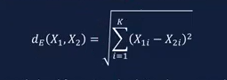

In [49]:
from IPython.display import Image

Image("img/6.png")

**Matriz de distancias**

 El paquete scipy.spatial nos proporciona el método distance_matrix() para calcular la matriz de distancias. 
    
Generalmente, las arrays están en forma de matriz 2-D y los vectores de la matriz son filas de matriz (matriz 1-D).

Calculamos la matriz de distancia para dos arrays 

Ambas arrays tienen la misma dimensión   ------ > 10,4

In [50]:
import numpy as np
from scipy.spatial import distance_matrix

In [51]:
# compute the distance matrix
# Le envio las variables de los dos datasets
# p= 2 significa el tipo de algoritmo que se utiliza
# Voy a medir la distacia de cada variable entre cada patron de test y cada patron de train
dist_mat = distance_matrix(df_test, df_train, p=2)

print("matrix x:\n", df_test)
print("matrix y:\n", df_train)

matrix x:
      0    1    2  clase
0  5.0  3.5  1.7    1.0
1  4.3  2.8  1.5    1.0
2  2.7  4.5  1.2    3.0
3  5.0  4.2  1.3    3.0
4  6.3  2.5  4.1    1.0
5  5.2  3.0  4.5    2.0
6  4.5  3.0  4.2    2.0
7  5.9  2.9  5.2    2.0
8  5.0  2.4  5.1    1.0
9  4.5  3.2  5.0    2.0
matrix y:
      0    1    2  clase
0  4.6  3.2  1.4    1.0
1  5.3  3.7  1.5    3.0
2  5.7  4.4  1.5    1.0
3  5.0  3.5  1.6    2.0
4  5.5  2.5  4.0    1.0
5  5.7  3.0  4.2    2.0
6  5.7  2.8  4.1    2.0
7  5.8  2.7  5.1    1.0
8  6.3  2.5  5.0    2.0
9  5.9  3.0  5.1    3.0


In [52]:
dist_mat

# Convierto mi matriz a pandas para poder visualizarla mejor
tabla_vecino = pd.DataFrame(dist_mat, columns= ['0','1','2','3','4','5','6','7','8','9'])

#tabla_vecino['y'] = df_train.clase

tabla_vecino

0         1         2         3         4         5         6  \
0  0.583095  2.042058  1.157584  1.004988  2.557342  2.826659  2.782085   
1  0.509902  2.410394  2.126029  1.410674  2.789265  3.207803  3.117691   
2  3.056141  2.736787  3.619392  2.729469  4.866210  4.609772  4.615192   
3  2.273763  0.616441  2.137756  1.256980  3.798684  3.367491  3.360059   
4  3.266497  3.633180  3.275668  3.152777  0.806226  1.272792  1.204160   
5  3.318132  3.240370  3.494281  2.949576  1.260952  0.583095  0.670820   
6  2.981610  3.069202  3.419064  2.694439  1.513275  1.200000  1.220655   
7  4.149699  3.961060  4.120679  3.758989  1.661325  1.024695  1.122497   
8  3.806573  4.328972  4.177320  3.802631  1.212435  1.630951  1.627882   
9  3.737646  3.760319  4.016217  3.449638  1.868154  1.456022  1.552417   

          7         8         9  
0  3.583294  3.818377  4.076763  
1  3.901282  4.164133  4.422669  
2  5.662155  5.692100  5.263079  
3  4.618441  4.389761  4.085340  
4  1.135782  1.345362  2.325941  
5  1.345363  1.307670  1.360147  
6  1.894730  2.032240  1.941649  
7  1.029563  0.600000  1.009950  
8  0.854401  1.646208  2.273763  
9  1.717557  1.931321  1.734935

Escojo cuales son las variables (x) con las distancias más pequeñas 

Es decir, busco los más cercanos con distancia más cortas

Si tengo **k = 3** busco los 3 vecinos más cercanos en cada linea

pero al final es solo para ubicar en que posicion están

Luego regresamos al conjuinto de train y vemos que se selecciono ahí como prediccion.

Entre los tres escojemos una categoria para ese registro

In [53]:
# Creo un data frame para guradar los 3 valores minimos.
# El key es el row y el value es la columna
for key, value in tabla_vecino.iterrows():
    
    min = value[0]
    
    for i in range(1,len(value)):
        
        if value[i] < min:
            min = value[i]

    print(min)
    
    #print('Esta es la key', key)
    #print('Este es el value', value)
   # print('Este es el key-value',value[key])



0.5830952671725921
0.509901862519673
2.7294687691163317
0.6164413152084476
0.8062259522629748
0.5830952876168306
1.1999998092651367
0.6000000635783299
0.8544005363795076
1.456021932007094


Aqui no fui capaz de obtener los 3 numeros mas bajos para poder compararlos con el train data set

Obtengo el número más bajo con el minimo pero no logro de manera manual generar un algoritmo 

### Lo intento hacer con la libreria de sklearn

Dividimos la muestra en los conjuntos de datos para el entrenamiento y para la prueba de exactitud

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( df_train, df_test, test_size=0.2, random_state=4)

print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)

print ('Set de Prueba:', X_test.shape,  y_test.shape)


Set de Entrenamiento: (8, 4) (8, 4)
Set de Prueba: (2, 4) (2, 4)


**Clasificacion**

In [55]:
#Defino el algoritmo a utilizar
#from sklearn.neighbors import KNeighborsClassifier
#algoritmo = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2, weights='uniform').fit(X_train,y_train)
#y_pred = algoritmo.predict(X_test)
from sklearn.neighbors import KNeighborsRegressor

algoritmo = KNeighborsRegressor(n_neighbors=3)
algoritmo.fit(X_train, y_train)

# Creo que el error lo encuentro aqui , pero aun no lo veo.
y_pred = algoritmo.predict(X_test)

y_pred

c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[4.       , 3.6000001, 1.4666667, 1.6666666],
       [5.2000003, 2.9666665, 4.633333 , 2.       ]], dtype=float32)